### 1. Import libraries

In [2]:
# install.packages("plot3D",repos = "http://cran.us.r-project.org")

library(ggplot2)
library(bestNormalize)
library(reshape2)
library(ggthemes) # visualization themes
library(grid)
library(gridExtra)
library(plot3D)

Sys.setenv("plotly_username"="ismaelcv")
Sys.setenv("plotly_api_key"="mPu4vLCVRK5jM10YwOAl")

Warning message:
"package 'plot3D' was built under R version 3.4.4"

### 2. Import dataset

In [3]:
moves <- read.csv("UCIdataset.csv")
ncol(moves);nrow(moves)
head(moves)

[1] 81

[1] 7352

activity,subject,tBodyAccMeanX,tBodyAccMeanY,tBodyAccMeanZ,tBodyAccStdX,tBodyAccStdY,tBodyAccStdZ,tGravityAccMeanX,tGravityAccMeanY,...,fBodyAccMagMeanFreq,fBodyBodyAccJerkMagMean,fBodyBodyAccJerkMagStd,fBodyBodyAccJerkMagMeanFreq,fBodyBodyGyroMagMean,fBodyBodyGyroMagStd,fBodyBodyGyroMagMeanFreq,fBodyBodyGyroJerkMagMean,fBodyBodyGyroJerkMagStd,fBodyBodyGyroJerkMagMeanFreq
WALKING,27,0.2621615,-0.001938289,-0.1089557,-0.3814690,-0.3221088,-0.25432672,0.9721845,-0.1820401,...,0.20267484,-0.29366305,-0.29412806,-0.20607799,-0.59157278,-0.4937016,-0.18279824,-0.73421807,-0.71297263,-0.08789385
WALKING,7,0.3540384,-0.032713178,-0.1300405,-0.2624242,0.2133682,0.10324062,0.9647089,-0.1934174,...,0.13298669,0.19351541,0.07118776,-0.03668598,-0.06934919,-0.3064302,0.20757925,-0.06931078,-0.03440660,-0.03424809
WALKING,7,0.3441476,-0.029870411,-0.1329481,-0.2381258,0.1080246,0.04633284,0.9603146,-0.1874567,...,0.14899605,0.03237990,-0.06602228,0.37015919,-0.01058384,-0.2796744,0.44519320,-0.06341142,-0.04954894,0.08100942
WALKING,26,0.2924063,0.009810011,-0.1011765,-0.4534596,-0.2862982,-0.34584007,0.9596695,-0.1545643,...,-0.01002817,-0.31804083,-0.21037403,0.28071755,-0.44428620,-0.4392971,-0.09489133,-0.62561734,-0.51844591,0.22217276
WALKING,7,0.3141912,-0.008695973,-0.1245610,-0.3558778,-0.1657995,0.40672936,0.8923025,-0.1469818,...,0.22194637,-0.08101258,-0.05616894,0.15600332,-0.25498770,-0.3944225,0.09312388,-0.29446303,-0.25580757,-0.15124255
WALKING,26,0.2441607,-0.007055326,-0.1246105,-0.4609535,-0.2398895,-0.37371011,0.9545493,-0.1357181,...,0.05095173,-0.40394272,-0.32422478,-0.05590307,-0.59845615,-0.6768159,0.17533397,-0.67435956,-0.62860237,0.14531889


No id variables; using all as measure variables


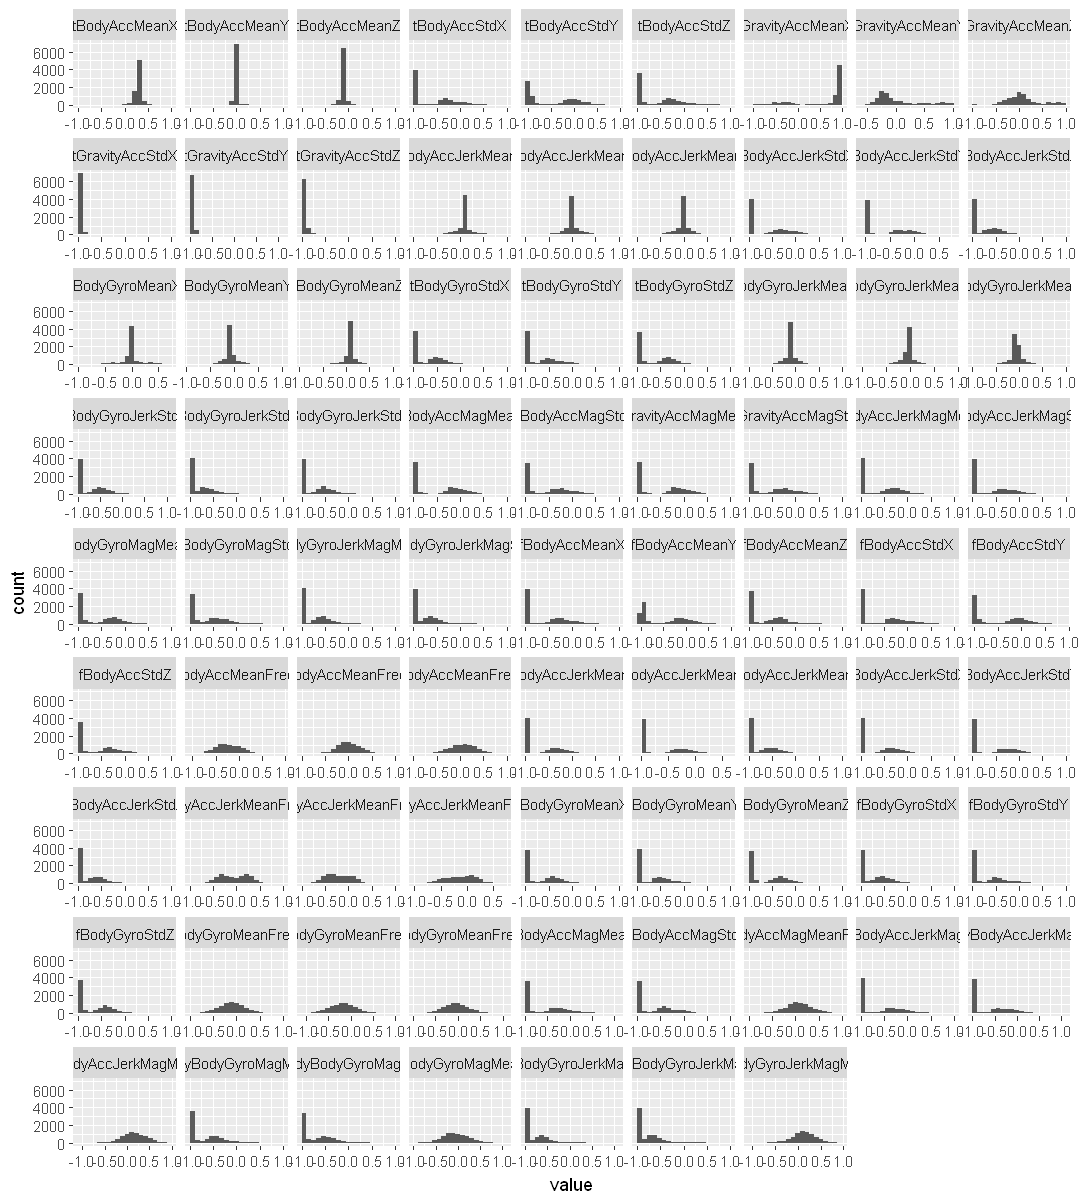

In [64]:
options(repr.plot.width=9, repr.plot.height=10) #Graph sizing in jupyter,for rstudio is not required

ggplot(data = melt(moves[3:ncol(moves)]), mapping = aes(x = value)) + 
    geom_histogram(bins = 20) + facet_wrap(~variable, scales = 'free_x')

### 3. Run PCA analysis 

In [4]:
source("PCA_functions.R")
my.pca.results<-my.pca(moves[3:ncol(moves)])
my.pca.results$summary
my.pca.results$loadings

All 7352 observations are valid.


,Eigenvalues,% explained,% explained cum.
PC1,45.8586,58.0488,58.0488
PC2,5.9301,7.5064,65.5552
PC3,2.7002,3.4180,68.9732
PC4,1.9945,2.5246,71.4978
PC5,1.7788,2.2517,73.7495
PC6,1.5315,1.9386,75.6881
PC7,1.4635,1.8525,77.5406
PC8,1.3783,1.7447,79.2853
PC9,1.2735,1.6120,80.8973
PC10,1.0361,1.3115,82.2088


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79
tBodyAccMeanX,-0.009452137,-0.138901091,-0.3843395195,-0.152985470,0.37470245,0.321486321,-0.07129983,0.05438946,0.043140972,-0.047976908,...,-4.064504e-07,3.297074e-07,-3.869360e-07,-2.024349e-07,3.428696e-07,5.316927e-08,-1.827681e-08,4.214693e-08,2.221224e-04,-6.942811e-05
tBodyAccMeanY,-0.045627325,0.003364601,-0.0410749808,-0.034474343,0.13644351,0.385465161,-0.35644416,0.14527161,0.083650235,0.327169450,...,-1.837726e-07,2.045684e-07,4.894041e-08,2.415261e-07,-9.383457e-08,-4.792720e-08,2.106167e-08,6.032952e-08,1.738848e-03,-4.195699e-04
tBodyAccMeanZ,-0.025316201,0.042437056,0.2402506082,0.204271315,-0.34221582,-0.162683092,0.26623159,0.06316176,0.113553534,0.567139215,...,3.658985e-09,2.039614e-08,-3.315037e-07,9.274199e-09,4.204355e-07,-1.966876e-07,7.528744e-08,7.430594e-08,2.879515e-03,9.558011e-04
tBodyAccStdX,0.953924728,-0.026779295,0.0527070250,-0.027463119,0.05934965,-0.002389111,0.06945536,0.19379738,-0.078057854,-0.003285134,...,-1.148837e-04,-2.790484e-04,-7.417272e-04,2.062936e-03,3.637785e-04,-7.007334e-04,3.610269e-04,5.882437e-04,-4.212626e-03,-3.303725e-03
tBodyAccStdY,0.969779105,0.056765410,0.0123693699,0.028682464,0.02074380,-0.003698654,0.01367985,0.09014249,-0.056517767,-0.012858225,...,-3.976350e-04,-1.714092e-04,4.730097e-04,5.642826e-04,-2.441013e-03,6.859616e-05,6.547400e-05,-1.500824e-05,-4.467571e-03,-4.167031e-03
tBodyAccStdZ,0.934021937,0.109931804,0.0152318201,0.073878985,-0.05262592,-0.018931878,-0.09832823,-0.19828558,-0.054073371,0.026543259,...,4.911476e-04,1.447602e-05,-1.209026e-04,-1.511016e-04,9.859762e-05,9.365294e-06,1.787287e-05,-8.944647e-06,-3.431226e-03,-4.888885e-03
tGravityAccMeanX,0.416355780,0.107038529,-0.5620999500,0.064453984,-0.50309165,0.069614435,-0.07164767,0.24185802,-0.002995722,-0.052643945,...,-1.305172e-06,8.773549e-07,-3.732002e-07,-2.400624e-07,5.553866e-07,-4.074021e-07,1.089669e-07,-1.834826e-07,-1.763531e-03,-1.286761e-03
tGravityAccMeanY,-0.541730558,-0.187447517,0.5114959409,-0.086273647,0.38003571,-0.048544150,0.05541522,-0.20930403,0.051869476,0.024930161,...,-1.710889e-06,6.376224e-07,-2.360989e-07,-2.246259e-07,5.185777e-08,-2.068196e-07,9.744623e-08,-2.132725e-09,7.610811e-04,2.436425e-03
tGravityAccMeanZ,-0.480838842,-0.086470578,0.4890061795,-0.096342969,0.47106093,-0.029517453,0.17045787,-0.01695606,0.024276824,0.049897788,...,-7.316893e-07,7.703465e-08,1.794815e-07,-6.679048e-07,1.491758e-07,2.596757e-08,-7.426374e-08,-2.647884e-07,2.588060e-03,4.373037e-04
tGravityAccStdX,0.163762638,0.326021551,0.7258905356,0.061235980,-0.21102055,-0.029230587,-0.21989474,0.04388720,-0.076349057,-0.088757774,...,-1.457065e-06,-9.618523e-07,7.200669e-08,-1.247837e-07,-1.411792e-06,2.761747e-07,-6.322897e-08,-1.636096e-07,-1.442384e-03,-6.350994e-04


In [66]:
load <- abs(my.pca.results$loadings)

In [67]:
df<- data.frame(col=rownames(load),max = rep(0, pc = rep(0)))

for(i in 1:nrow(load)){
    grande <- 1
    for(j in 2:ncol(load)){
        if (load[i,j] > load[i,grande]){ grande <-j}
    }
    df[i,2] <- load[i,grande] 
    df[i,3] <- grande    
}

In [68]:
max(df$max)
min(df$max)
table(df$V3)

[1] 0.9815003

[1] 0.4131944


 1  2  3  4  6  9 10 11 12 14 
53  7  5  3  2  2  2  3  1  1 

In [5]:
chosen <- data.frame(moves[c(1:2)],my.pca.results$scores[,c(1:6)])
str(chosen)

'data.frame':	7352 obs. of  8 variables:
 $ activity: Factor w/ 6 levels "LAYING","SITTING",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ subject : int  27 7 7 26 7 26 6 6 6 7 ...
 $ PC1     : num  4 10.78 9.65 4.35 8.36 ...
 $ PC2     : num  -0.16 -2.129 -3.619 -0.637 -1.689 ...
 $ PC3     : num  -0.376 -0.504 -0.257 -0.462 -0.674 ...
 $ PC4     : num  -2.35 -0.486 0.366 1.719 0.728 ...
 $ PC5     : num  -1.548 0.298 -0.426 0.78 -0.343 ...
 $ PC6     : num  -0.156 1.531 1.287 0.564 -0.107 ...


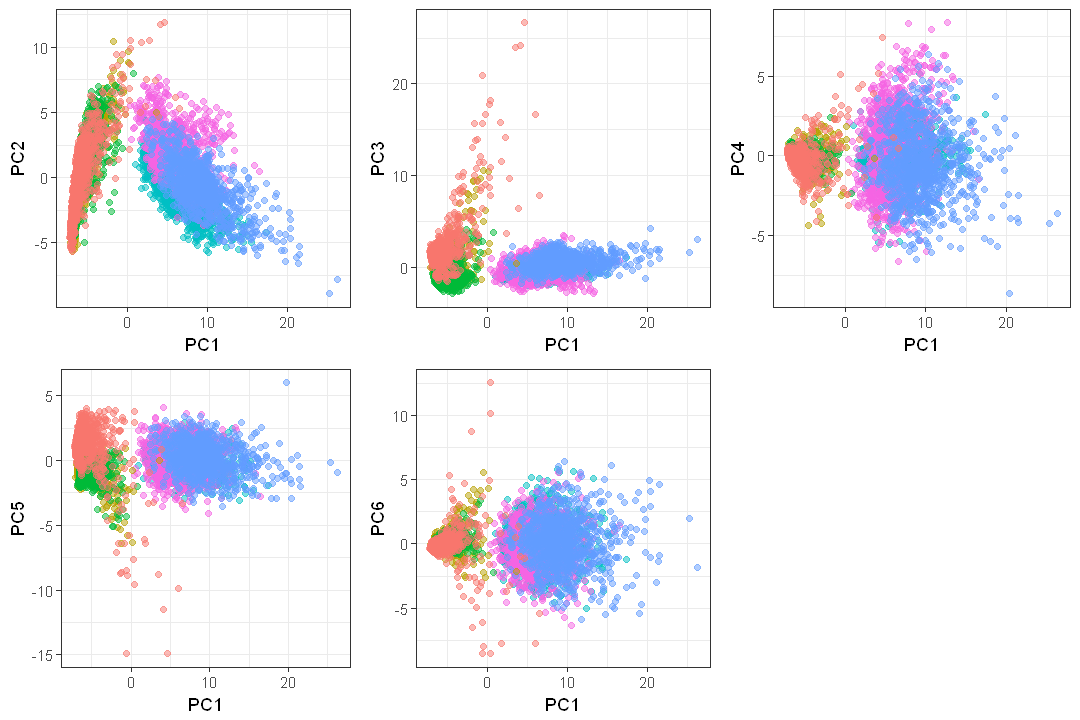

In [122]:

p1<- ggplot(chosen,) + 
  geom_point(aes(x = PC1, y=PC2, color=activity),alpha=0.5) + 
  theme_bw() +  scale_size(1)+  theme(legend.position = "none")

p2<- ggplot(chosen,) + 
  geom_point(aes(x = PC1, y=PC3, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

p3<- ggplot(chosen,) + 
  geom_point(aes(x = PC1, y=PC4, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

p4<- ggplot(chosen,) + 
  geom_point(aes(x = PC1, y=PC5, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

p5<- ggplot(chosen,) + 
  geom_point(aes(x = PC1, y=PC6, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

options(repr.plot.width=9,repr.plot.height=6) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, p4, p5, ncol = 3)
   

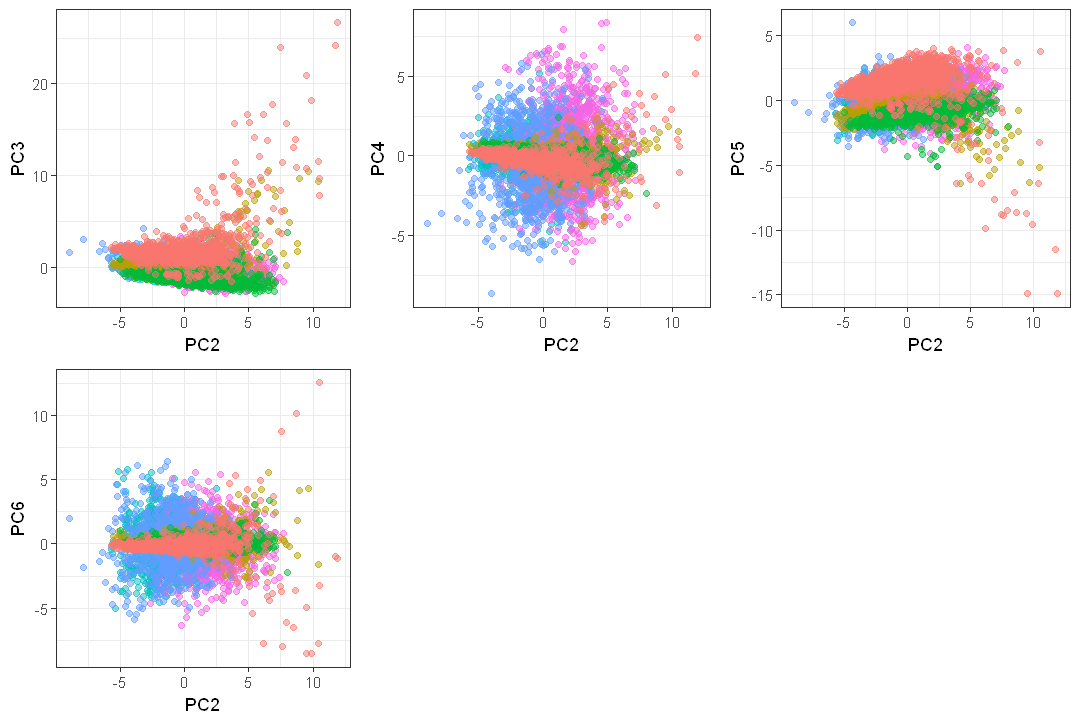

In [124]:
p1<- ggplot(chosen,) + 
  geom_point(aes(x = PC2, y=PC3, color=activity),alpha=0.5) + 
  theme_bw() +  scale_size(1)+  theme(legend.position = "none")

p2<- ggplot(chosen,) + 
  geom_point(aes(x = PC2, y=PC4, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

p3<- ggplot(chosen,) + 
  geom_point(aes(x = PC2, y=PC5, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

p4<- ggplot(chosen,) + 
  geom_point(aes(x = PC2, y=PC6, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

options(repr.plot.width=9,repr.plot.height=6) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, p4, ncol = 3)
   

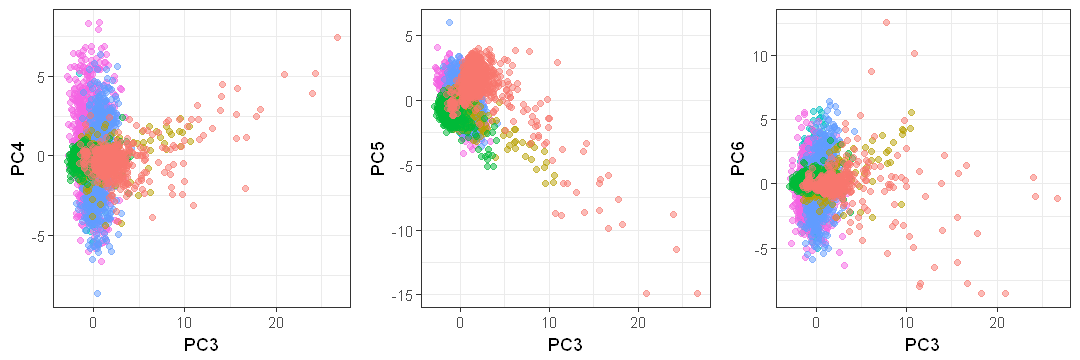

In [126]:
p1<- ggplot(chosen,) + 
  geom_point(aes(x = PC3, y=PC4, color=activity),alpha=0.5) + 
  theme_bw() +  scale_size(1)+  theme(legend.position = "none")

p2<- ggplot(chosen,) + 
  geom_point(aes(x = PC3, y=PC5, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")

p3<- ggplot(chosen,) + 
  geom_point(aes(x = PC3, y=PC6, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")


options(repr.plot.width=9,repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, p3, ncol = 3)

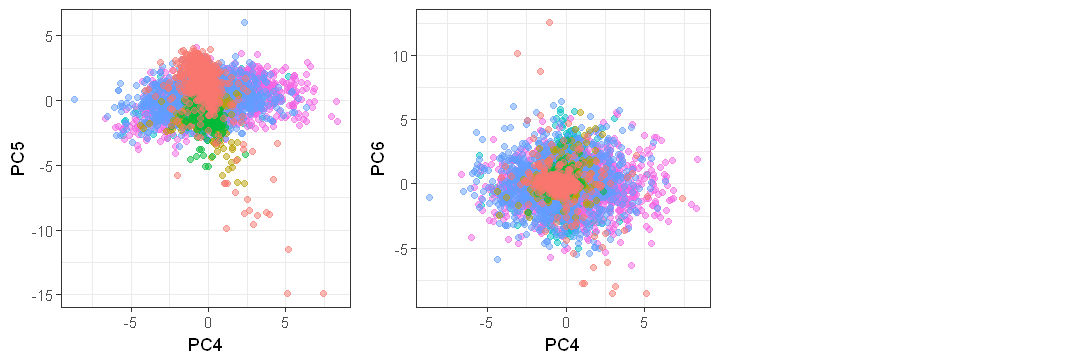

In [127]:
p1<- ggplot(chosen,) + 
  geom_point(aes(x = PC4, y=PC5, color=activity),alpha=0.5) + 
  theme_bw() +  scale_size(1)+  theme(legend.position = "none")

p2<- ggplot(chosen,) + 
  geom_point(aes(x = PC4, y=PC6, color=activity),alpha=0.5) + 
  theme_bw() + scale_size(1)+  theme(legend.position = "none")



options(repr.plot.width=9,repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, p2, ncol = 3)

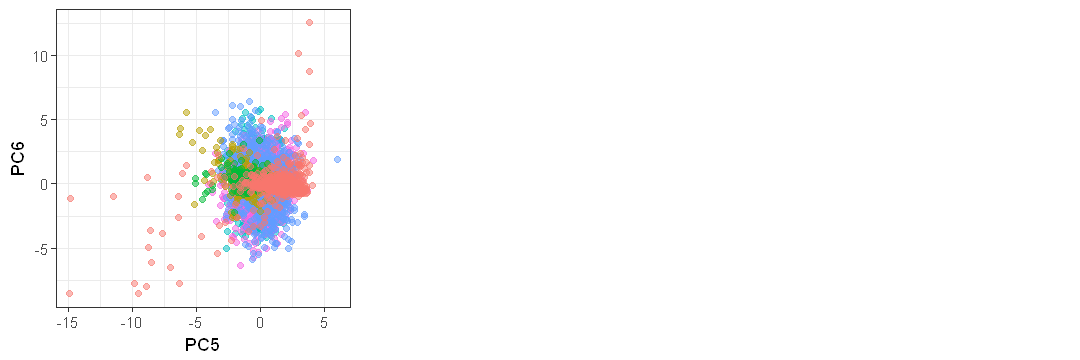

In [131]:
p1<- ggplot(chosen,) + 
  geom_point(aes(x = PC5, y=PC6, color=activity),alpha=0.5) + 
  theme_bw() +  scale_size(1)+  theme(legend.position = "none")


options(repr.plot.width=9,repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required
grid.arrange(p1, ncol = 3)

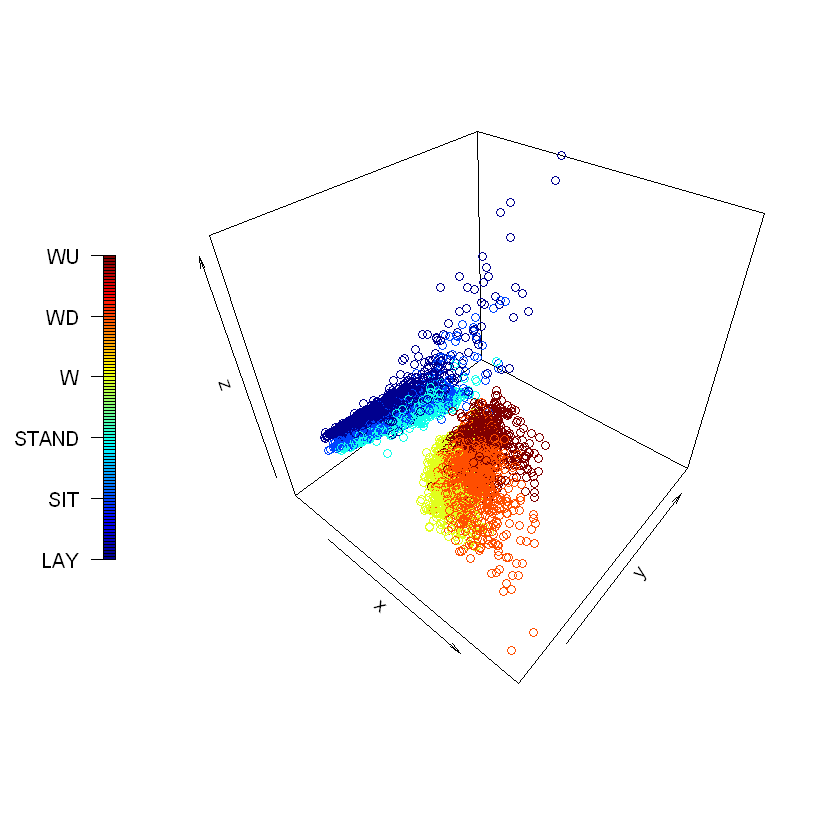

In [27]:
scatter3D(chosen$PC1, chosen$PC2, chosen$PC3, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

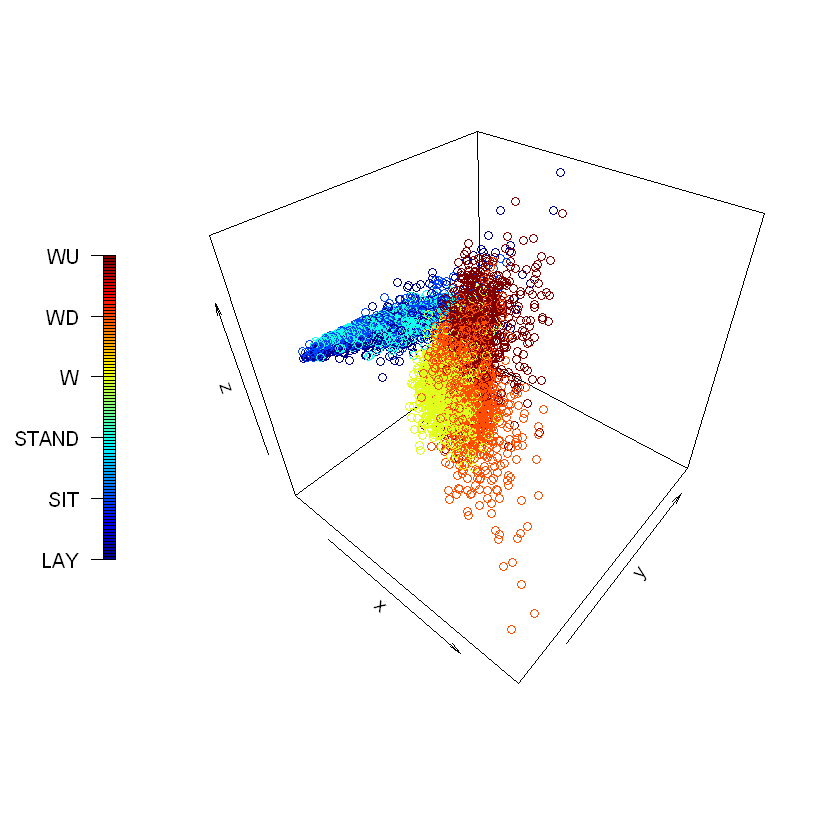

In [28]:
scatter3D(chosen$PC1, chosen$PC2, chosen$PC4, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

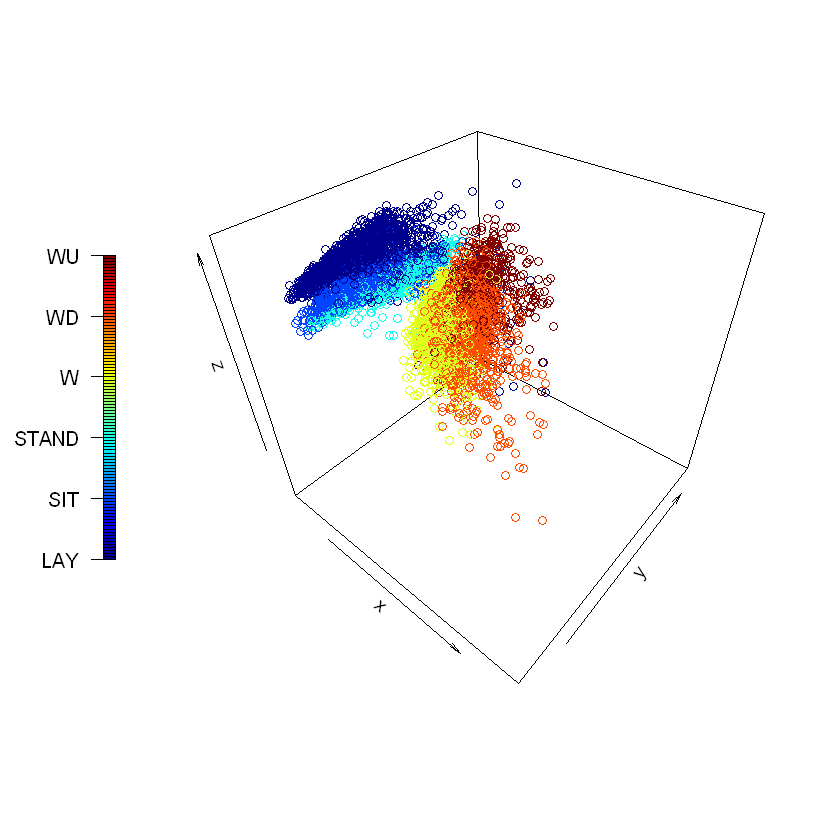

In [29]:
scatter3D(chosen$PC1, chosen$PC2, chosen$PC5, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

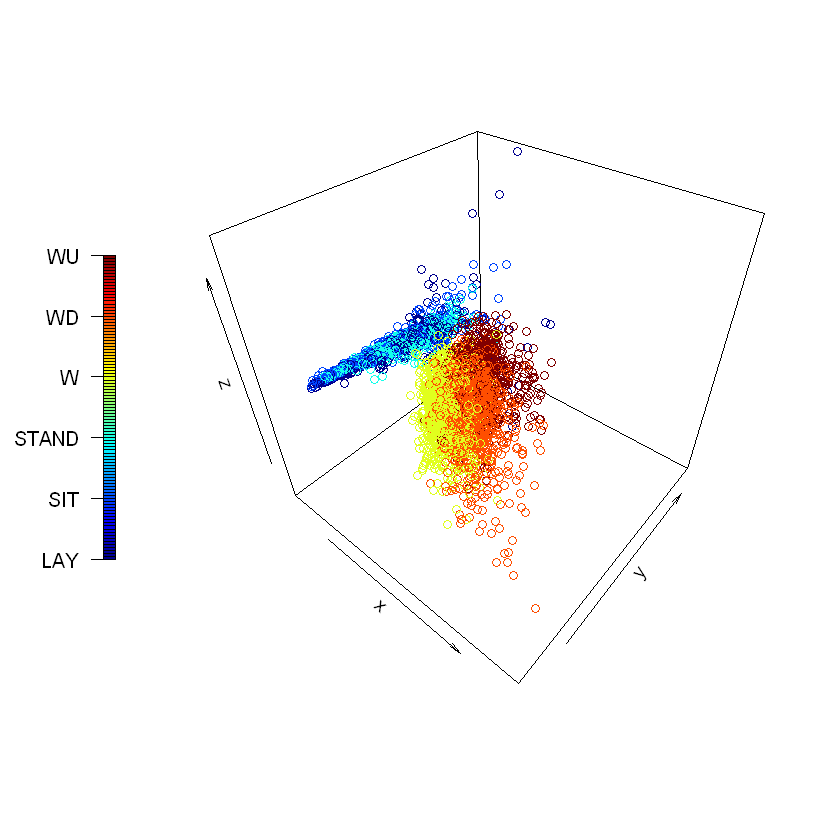

In [30]:
scatter3D(chosen$PC1, chosen$PC2, chosen$PC6, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

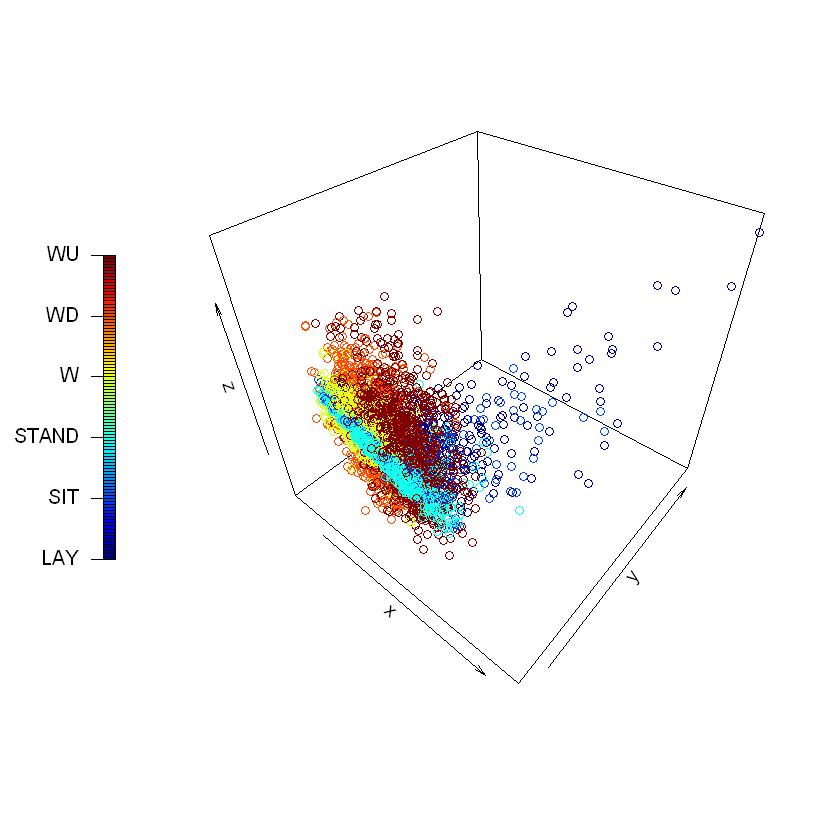

In [35]:
scatter3D(chosen$PC2, chosen$PC3, chosen$PC4, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

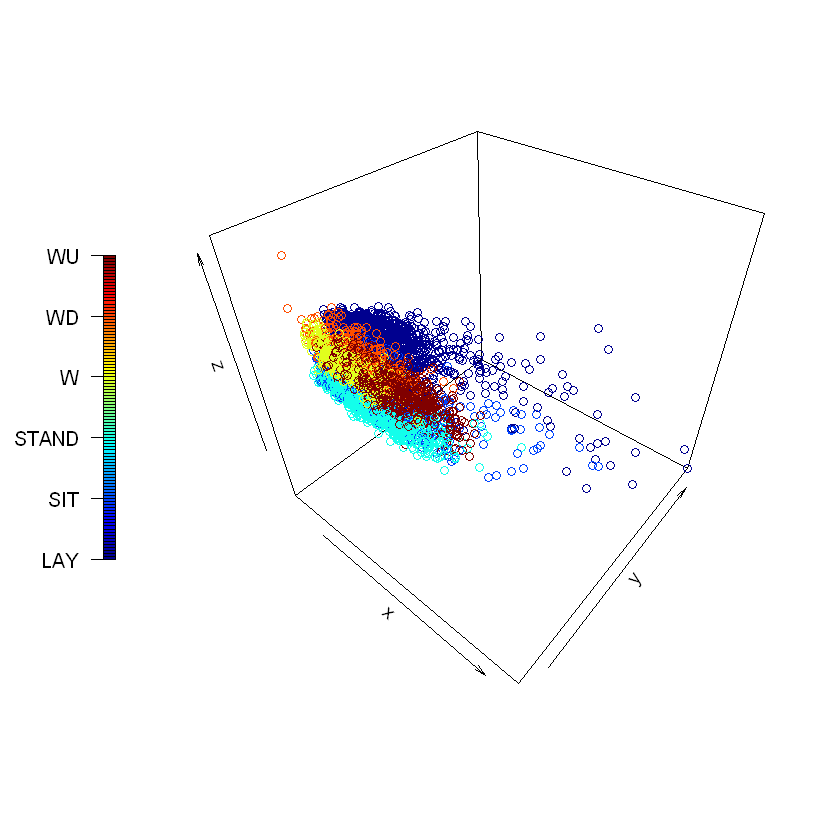

In [36]:
scatter3D(chosen$PC2, chosen$PC3, chosen$PC5, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

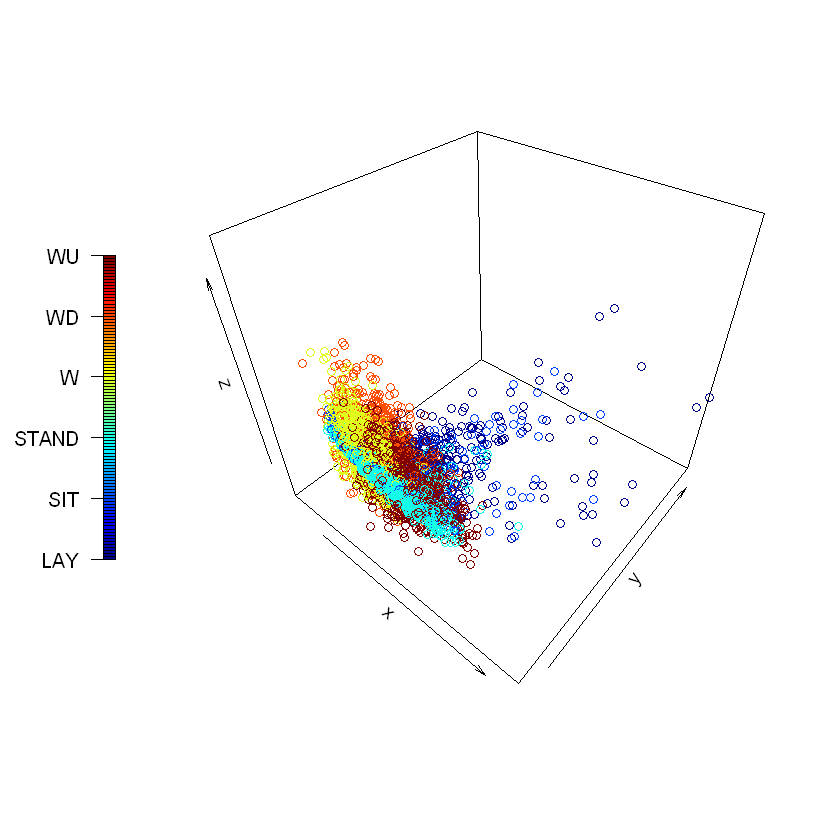

In [37]:
scatter3D(chosen$PC2, chosen$PC3, chosen$PC6, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

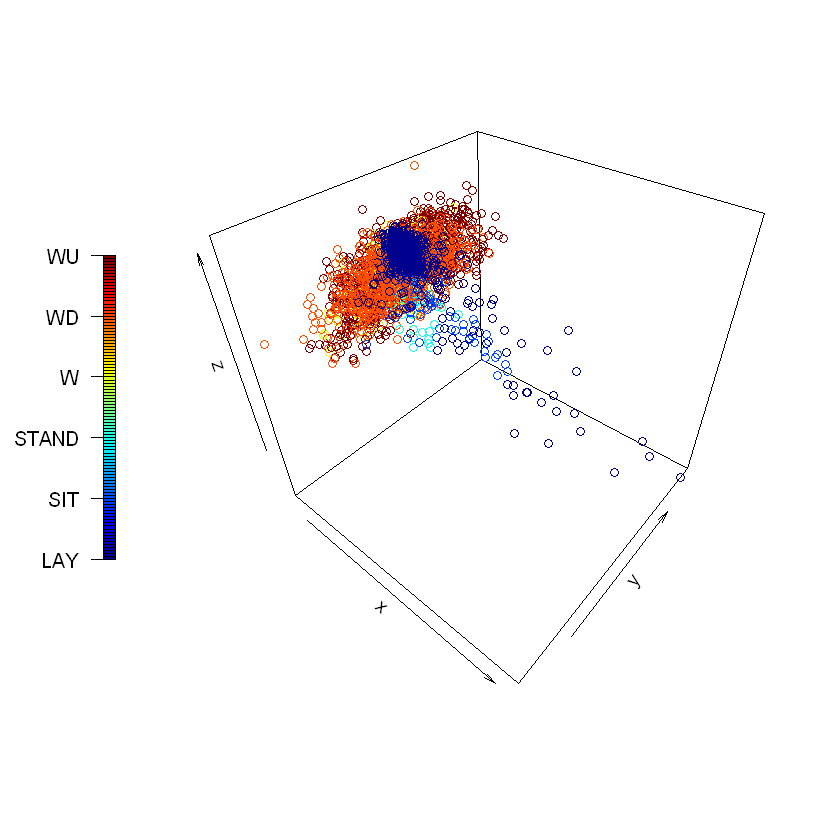

In [38]:
scatter3D(chosen$PC3, chosen$PC4, chosen$PC5, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

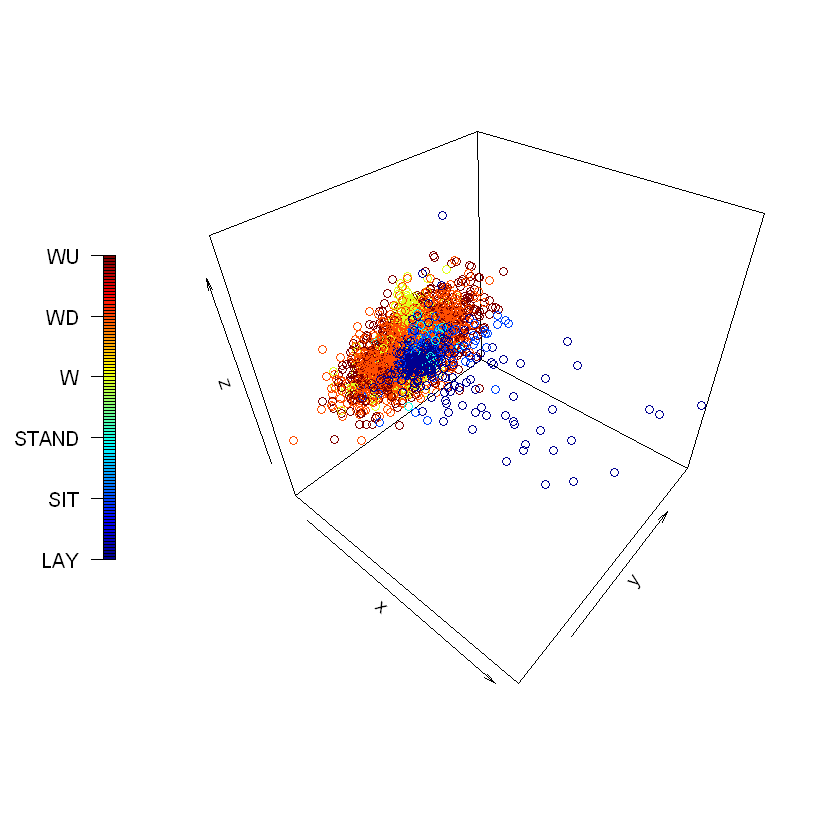

In [39]:
scatter3D(chosen$PC3, chosen$PC4, chosen$PC6, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))

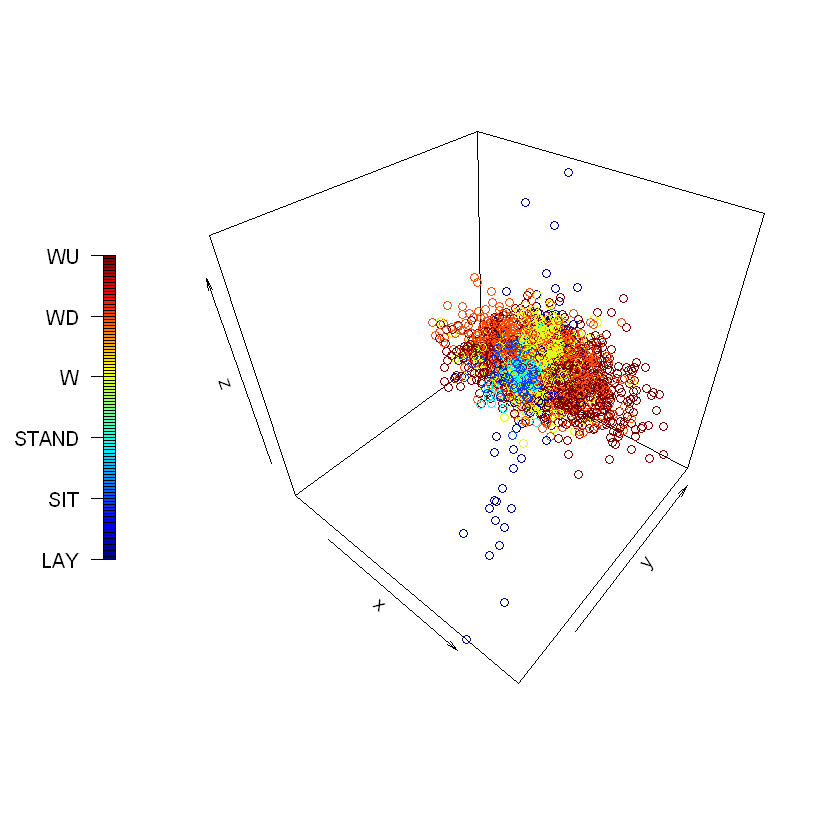

In [34]:
scatter3D(chosen$PC4, chosen$PC5, chosen$PC6, colvar = as.integer(chosen$activity),
          colkey = list(at = c(1,2,3,4,5,6), side = 2, 
          addlines = TRUE, length = 0.5, width = 0.5,
          labels = c('LAY','SIT','STAND','W','WD','WU')))